# Project 1

## Loading Data

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

import json
import csv
from networkx.algorithms import bipartite as bi

In [2]:

df=pd.read_csv('https://github.com/mianshariq/Datasets/raw/401a2445f83e1456cc10c4cf6ba3c52c61620521/aircraft2022.csv')


In [3]:
df

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
0,2022,F9,Frontier Airlines Inc.,2010.0,Frontier Airlines Inc.,4253,N205FR,b,N,180,Airbus,694,320-214,162000,3/30/2010 0:00,20436,F9
1,2022,F9,Frontier Airlines Inc.,2010.0,Frontier Airlines Inc.,4272,N206FR,b,N,180,Airbus,694,320-214,162000,4/26/2010 0:00,20436,F9
2,2022,F9,Frontier Airlines Inc.,2010.0,Frontier Airlines Inc.,4307,N207FR,b,Y,180,Airbus,694,320-214,162000,5/11/2010 0:00,20436,F9
3,2022,F9,Frontier Airlines Inc.,2011.0,Frontier Airlines Inc.,4668,N210FR,b,Y,180,Airbus,694,320-214,162000,4/21/2011 0:00,20436,F9
4,2022,F9,Frontier Airlines Inc.,2011.0,Frontier Airlines Inc.,4688,N211FR,b,Y,180,Airbus,694,320-214,162000,5/10/2011 0:00,20436,F9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7846,2022,5V,Tatonduk Outfitters Limited d/b/a Everts Air A...,1987.0,Tatonduk Outfitters Limited d/b/a Everts Air A...,49470,N961CE,B,Y,0,McDonnell-Douglas,6552,DC-9-82CARGO,45000,6/15/2014 0:00,20408,5V
7847,2022,5V,Tatonduk Outfitters Limited d/b/a Everts Air A...,1996.0,Tatonduk Outfitters Limited d/b/a Everts Air A...,53471,N962CE,B,Y,0,McDonnell-Douglas,6552,DC-9-82CARGO,45000,2/23/2018 0:00,20408,5V
7848,2022,5V,Tatonduk Outfitters Limited d/b/a Everts Air A...,1992.0,Tatonduk Outfitters Limited d/b/a Everts Air A...,53078,N964CE,B,Y,0,McDonnell-Douglas,6552,DC-9-83CARGO,45000,4/26/2016 0:00,20408,5V
7849,2022,5V,Tatonduk Outfitters Limited d/b/a Everts Air A...,1992.0,Tatonduk Outfitters Limited d/b/a Everts Air A...,53079,N965CE,B,Y,0,McDonnell-Douglas,6552,DC-9-83CARGO,45000,4/19/2014 0:00,20408,5V


In [4]:
df.MANUFACTURER.value_counts()

Boeing               3623
Airbus               1957
Bombardier            934
Embraer               796
Cessna                255
McDonnell-Douglas     161
ATR                    65
Gulfstream             45
Dassault               15
Name: MANUFACTURER, dtype: int64

## Basic NX Graph

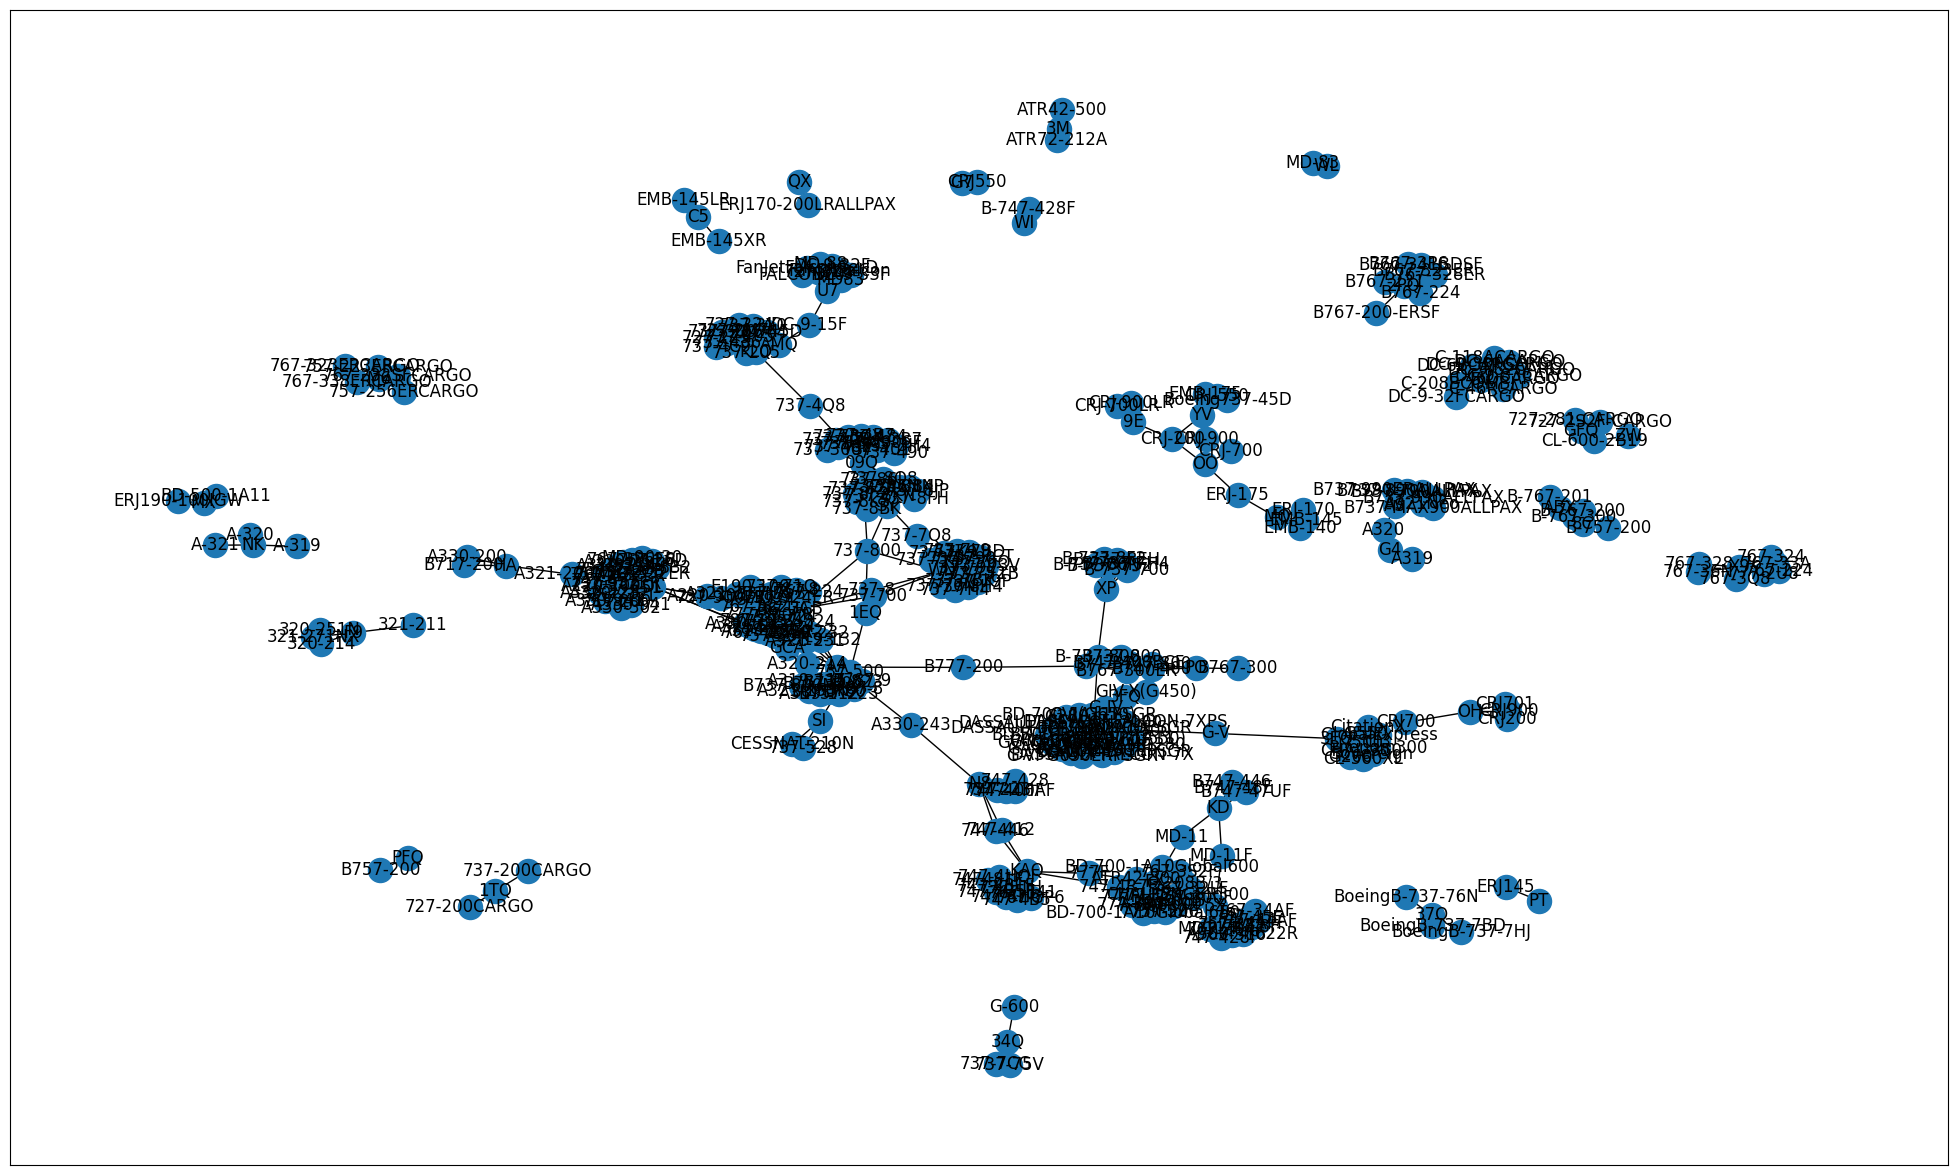

In [5]:
G=nx.Graph()
G=nx.from_pandas_edgelist(df, 'CARRIER', 'MODEL',edge_attr='MANUFACTURER',create_using=nx.Graph())
plt.figure(figsize=(25,15))
nx.draw_networkx(G,with_labels=True)

## Addiding some Colors to the graph

In [6]:
G=nx.Graph()

G=nx.from_pandas_edgelist(df, 'CARRIER', 'MODEL',edge_attr='MANUFACTURER',create_using=nx.Graph())
plt.figure(figsize=(25,15))
# Define the colors for Origin and Carrier groups
origin_color = 'skyblue'
carrier_color = 'orange'

# Create dictionaries to store node colors for each group
origin_node_colors = {}
carrier_node_colors = {}

# Iterate over nodes and assign colors based on groups
for node in G.nodes:
    if node in df['CARRIER'].unique():
        origin_node_colors[node] = origin_color
    elif node in df['MODEL'].unique():
        carrier_node_colors[node] = carrier_color





<Figure size 2500x1500 with 0 Axes>

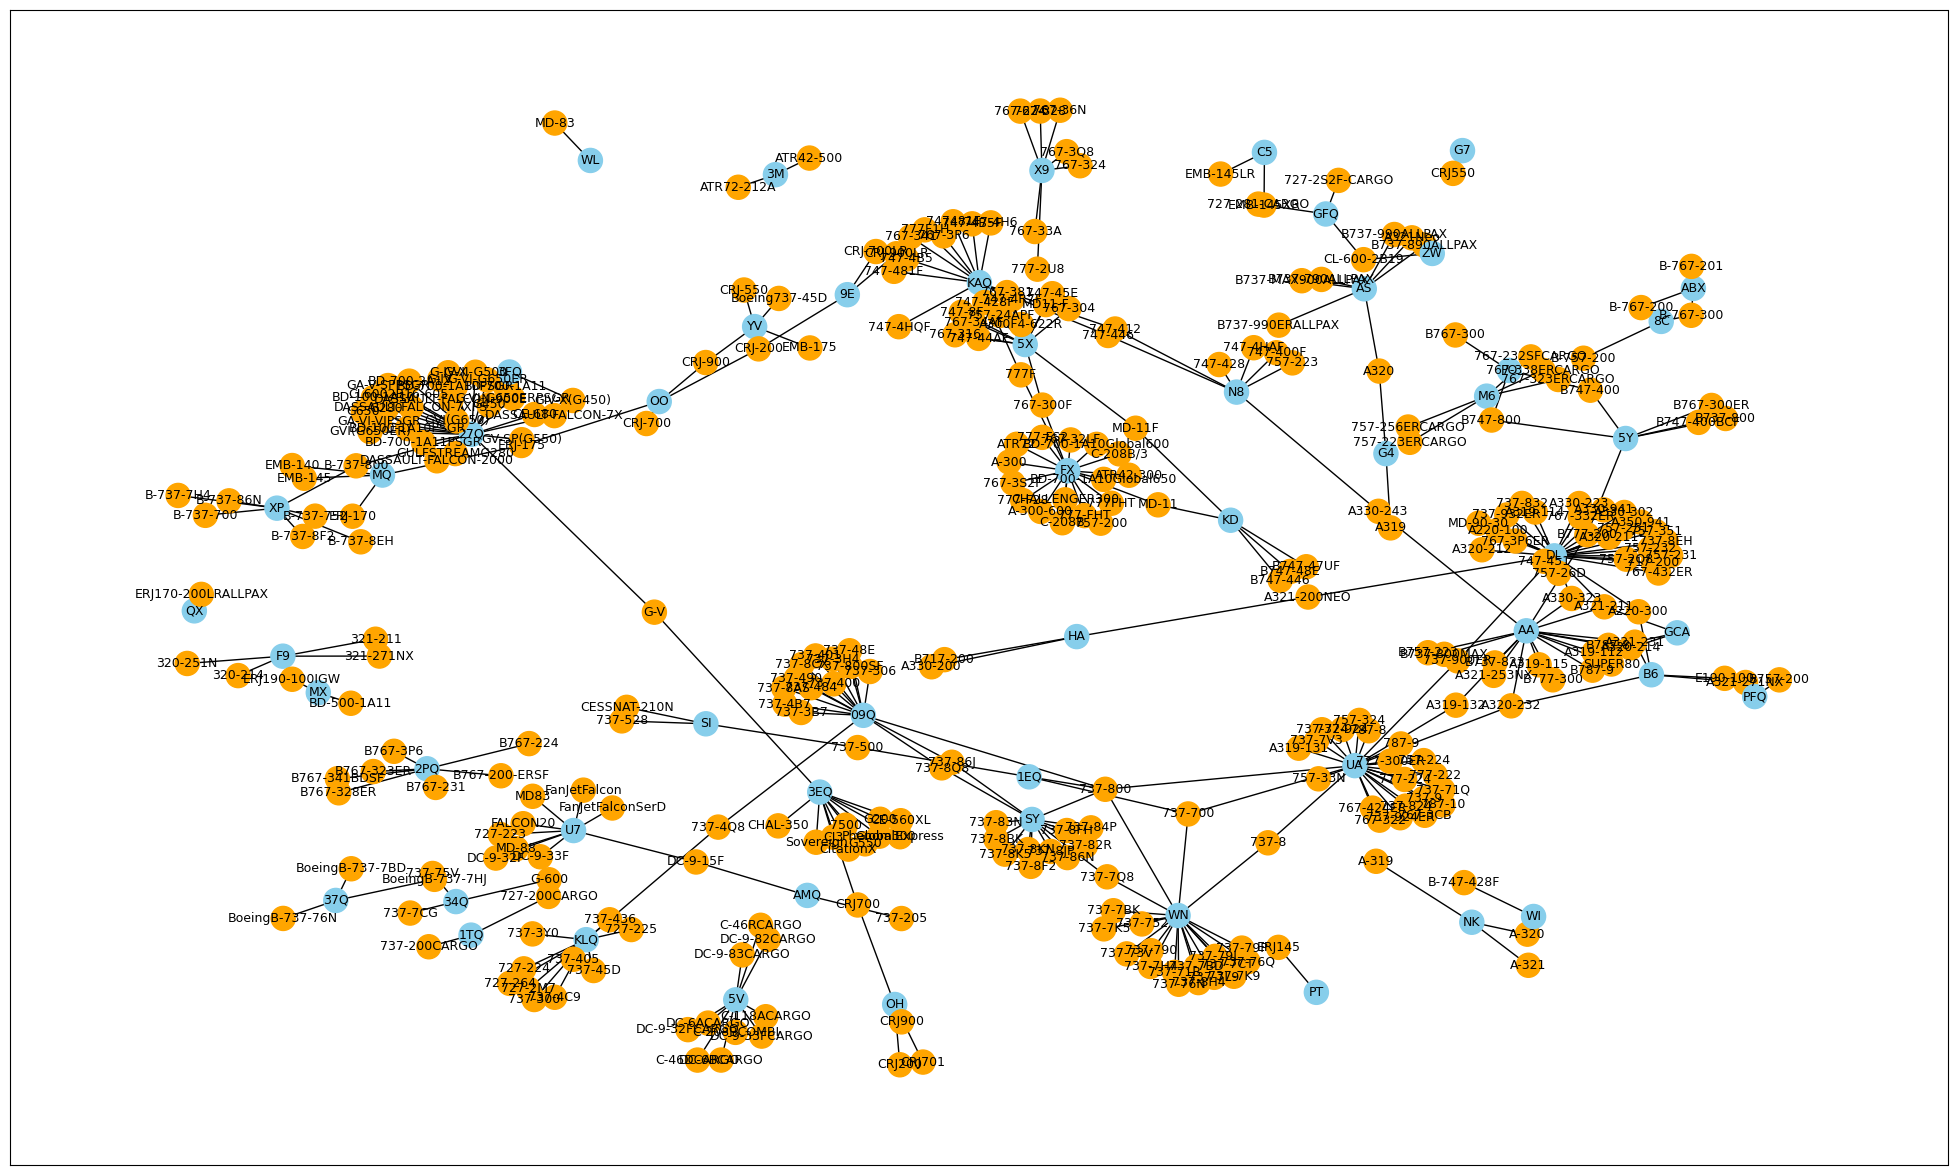

In [7]:
# Draw the graph with node colors based on the groups
plt.figure(figsize=(25, 15))
pos = nx.spring_layout(G, k=0.1, iterations=50)
nx.draw_networkx(G, pos, with_labels=True, node_color=[origin_node_colors.get(node, carrier_node_colors.get(node)) for node in G.nodes],font_size=9)

# Display the graph
plt.show()

# Calculating Degree of Centrality to show top Airlines and Aircrafts.

In [8]:
deg=nx.degree(G)
degrees = dict(G.degree())
# Sort the closeness centrality values in descending order
sorted_degree = sorted(degrees.items(), key=lambda x: x[1], reverse=True)

sorted_degree[:20]

[('DL', 28),
 ('27Q', 28),
 ('UA', 26),
 ('WN', 20),
 ('FX', 19),
 ('AA', 18),
 ('09Q', 16),
 ('5X', 14),
 ('SY', 14),
 ('KAQ', 13),
 ('3EQ', 12),
 ('KLQ', 11),
 ('5V', 10),
 ('U7', 9),
 ('AS', 7),
 ('N8', 7),
 ('X9', 7),
 ('XP', 7),
 ('2PQ', 7),
 ('5Y', 6)]

Computing Closeness Centraliy Centrality to show top Airlines and Aircrafts with closest distances. Node 'UA' has the highest closeness centrality value of 0.12, indicating that it is the most central node in terms of proximity to other nodes.

In [9]:
closeness = nx.closeness_centrality(G)

# Sort the closeness centrality values in descending order
sorted_closeness = sorted(closeness.items(), key=lambda x: x[1], reverse=True)

sorted_closeness[:20]

[('UA', 0.1216752244907892),
 ('AA', 0.12029568679814986),
 ('A320-232', 0.11775892980684594),
 ('A319-132', 0.11672254758632364),
 ('737-800', 0.111802735253918),
 ('A330-243', 0.10926961457875199),
 ('DL', 0.10804561685943807),
 ('737-900ER', 0.10536325298507267),
 ('A321-211', 0.10412246884785886),
 ('A330-323', 0.10391850710672691),
 ('737-700', 0.10351297146923726),
 ('B6', 0.10261198815857657),
 ('737-8', 0.10251284614103205),
 ('N8', 0.09990658734083632),
 ('B777-200', 0.09962516033424242),
 ('A319-131', 0.09906703618671166),
 ('A321-231', 0.09906703618671166),
 ('737-71Q', 0.09906703618671166),
 ('737-724', 0.09906703618671166),
 ('737-7V3', 0.09906703618671166)]

Betweeness centrality provides a ranked view of the nodes based on their betweenness centrality values, allowing you to identify the nodes that act as bridges or key connectors in the graph's communication network. Here UA has the higest betweeness, which means it has the mose diverse set of aircrafts

Its intresting to see B6 in the Closeness centrality but not in the betweenness. Here it means that Jetblue has lots of Aircrafts but very few of variation

In [10]:
betweeness = nx.betweenness_centrality(G)

# Sort the closeness centrality values in descending order
sorted_betweeness = sorted(betweeness.items(), key=lambda x: x[1], reverse=True)

sorted_betweeness[:20]

[('UA', 0.15953143518257243),
 ('AA', 0.15495778677180003),
 ('N8', 0.11415006490208252),
 ('A330-243', 0.11252045826513912),
 ('KAQ', 0.10702729649905),
 ('737-800', 0.10364435943122625),
 ('DL', 0.0735716334900121),
 ('09Q', 0.06476791122792594),
 ('A320-232', 0.05481501562756149),
 ('FX', 0.051594804070959614),
 ('747-412', 0.05113155369941871),
 ('747-446', 0.05113155369941871),
 ('A319-132', 0.048094106004047316),
 ('777F', 0.047270350095001606),
 ('WN', 0.04540874874697327),
 ('5X', 0.038543841827040654),
 ('747-4R7F', 0.0357361213010516),
 ('737-900ER', 0.03536164098801662),
 ('SY', 0.03062639243857146),
 ('737-4Q8', 0.029332919464981094)]

 Eigenvector centrality measures the influence or importance of a node in a network. It considers both the node's own centrality and the centrality of its neighboring nodes. Nodes with higher eigenvector centrality values are considered more influential within the network.

In [11]:
eigenvector = nx.eigenvector_centrality(G, max_iter=1000, tol=1e-6)
sorted_eigenvector = sorted(eigenvector.items(), key=lambda x: x[1], reverse=True)

sorted_eigenvector[:20]

[('DL', 0.5001237728893076),
 ('UA', 0.4229747078093771),
 ('AA', 0.17738744073302837),
 ('737-900ER', 0.16915596319372517),
 ('WN', 0.15811571081442682),
 ('737-800', 0.1373221866346344),
 ('A321-211', 0.13158014763730766),
 ('A330-323', 0.12415240014806554),
 ('A320-232', 0.11976505096419368),
 ('737-700', 0.11527220040490273),
 ('A319-132', 0.11001534862633931),
 ('737-8', 0.10648394343724327),
 ('A220-300', 0.10139620969558005),
 ('A321-200NEO', 0.09506871920372412),
 ('A220-100', 0.09164650735772567),
 ('A319-114', 0.09164650735772567),
 ('A320-211', 0.09164650735772567),
 ('A320-212', 0.09164650735772567),
 ('A330-223', 0.09164650735772567),
 ('A330-302', 0.09164650735772567)]

## Creating table of Centrality Metrics

In [19]:
degree_centrality = nx.degree_centrality(G)

# Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000, tol=1e-6)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)


# Create a DataFrame to store the centrality measures
centrality_df = pd.DataFrame({
    'Node': G.nodes(),
    'Degree Centrality': degree_centrality.values(),
    'Eigenvector Centrality': eigenvector_centrality.values(),
    'Betweenness Centrality': betweenness_centrality.values(),
    'Closeness_centrality' : closeness_centrality.values(),
})

# Sort the DataFrame by Degree Centrality in descending order
centrality_df.sort_values('Degree Centrality', ascending=False, inplace=True)

# Print the centrality measures in the desired format
centrality_df

,Node,Degree Centrality,Eigenvector Centrality,Betweenness Centrality,Closeness_centrality
223,27Q,0.074271,2.274728e-03,0.017086,0.069635
5,DL,0.074271,5.001238e-01,0.073572,0.108046
20,UA,0.068966,4.229747e-01,0.159531,0.121675
94,WN,0.053050,1.581157e-01,0.045409,0.095586
9,FX,0.050398,9.468080e-05,0.051595,0.068452
...,...,...,...,...,...
154,747-481F,0.002653,1.736582e-04,0.000000,0.072325
153,747481F,0.002653,1.736582e-04,0.000000,0.072325
152,747-45E,0.002653,1.218014e-05,0.000000,0.060319
151,747-451,0.002653,9.164651e-02,0.000000,0.089840


 Nodes with higher eigenvector centrality values are considered more influential within the network of each group.

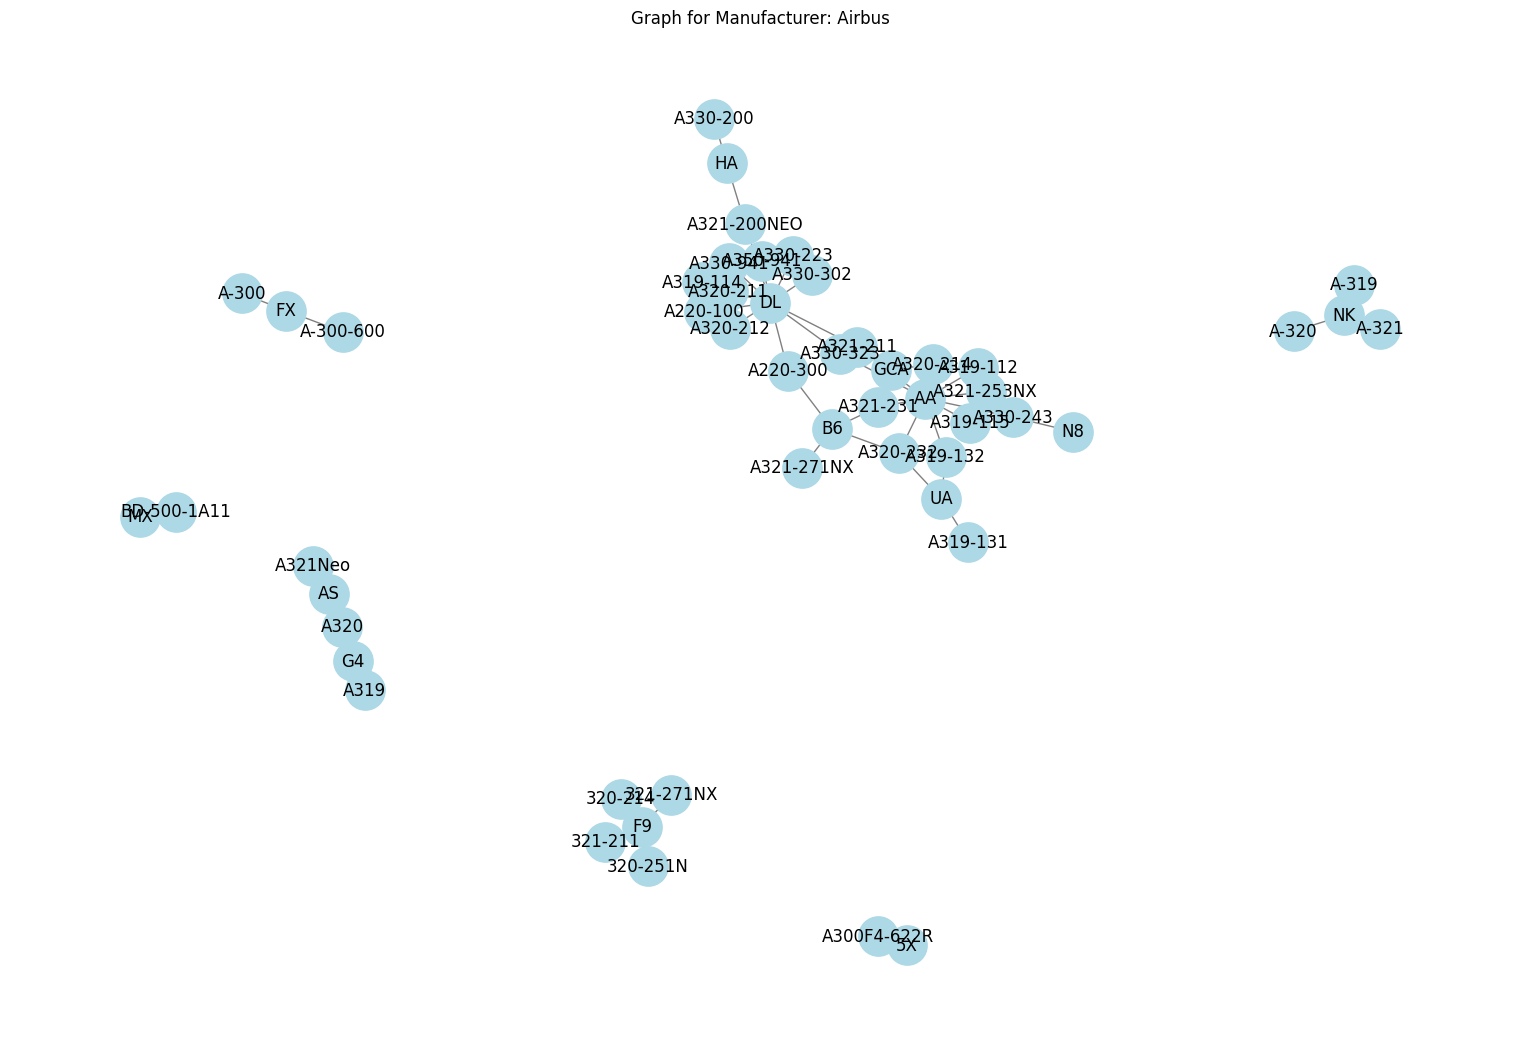

Manufacturer: Airbus
Eigenvector Centrality:
Node DL: 0.4899255607501248
Node AA: 0.44276146087106616
Node A321-211: 0.28927751888059117
Node A330-323: 0.24449730635766
Node A321-231: 0.20150198164818237
Node A320-232: 0.18033713965691697
Node GCA: 0.17082152914091583
Node A220-300: 0.16908192018759852
Node A320-214: 0.16084879017058754
Node B6: 0.1550784856402287
Node A319-132: 0.13968394817932214
Node A321-200NEO: 0.1386599441733957
Node A320-211: 0.1284287287100037
Node A330-302: 0.1284287287100037
Node A330-941: 0.1284287287100037
Node A220-100: 0.1284287287100037
Node A350-941: 0.1284287287100037
Node A330-223: 0.1284287287100037
Node A320-212: 0.1284287287100037
Node A319-114: 0.1284287287100037
Node A330-243: 0.12463362606871041
Node A321-253NX: 0.1160685776476563
Node A319-115: 0.1160685776476563
Node A319-112: 0.1160685776476563
Node UA: 0.0900836793934396
Node A321-271NX: 0.04065319147759484
Node HA: 0.039030038283373224
Node N8: 0.03267244899045572
Node A319-131: 0.023615370

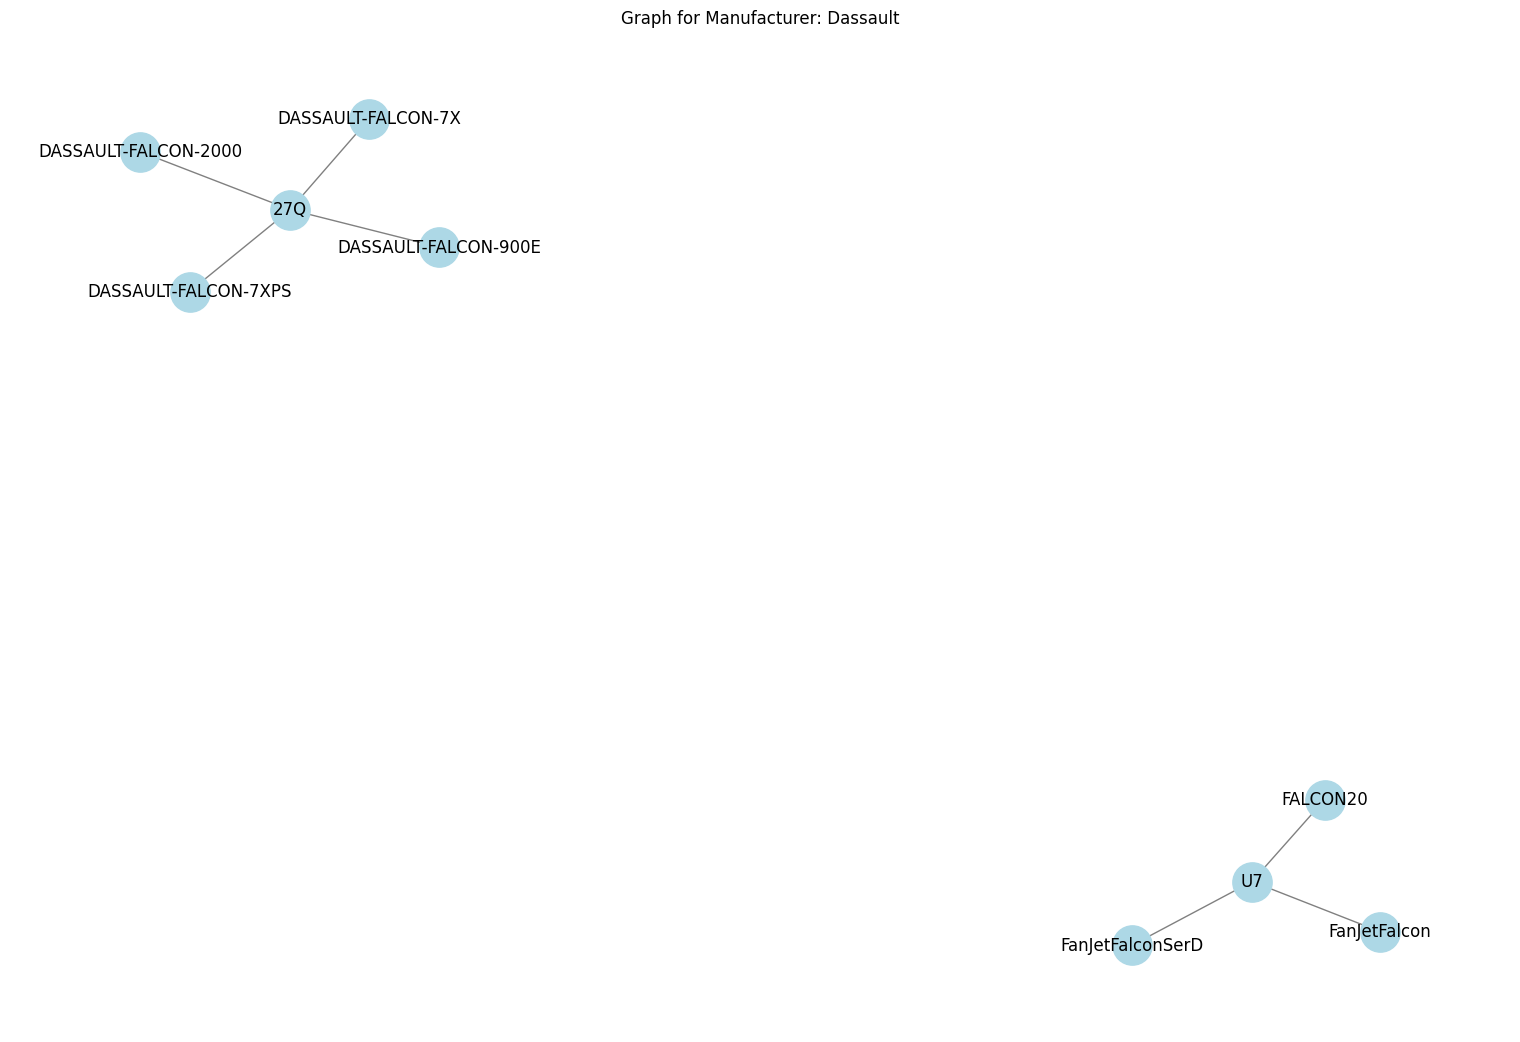

Manufacturer: Dassault
Eigenvector Centrality:
Node 27Q: 0.7071067804735244
Node DASSAULT-FALCON-7X: 0.3535533902367622
Node DASSAULT-FALCON-7XPS: 0.3535533902367622
Node DASSAULT-FALCON-900E: 0.3535533902367622
Node DASSAULT-FALCON-2000: 0.3535533902367622
Node U7: 3.1754794589256095e-05
Node FALCON20: 1.8333639204168273e-05
Node FanJetFalconSerD: 1.8333639204168273e-05
Node FanJetFalcon: 1.8333639204168273e-05



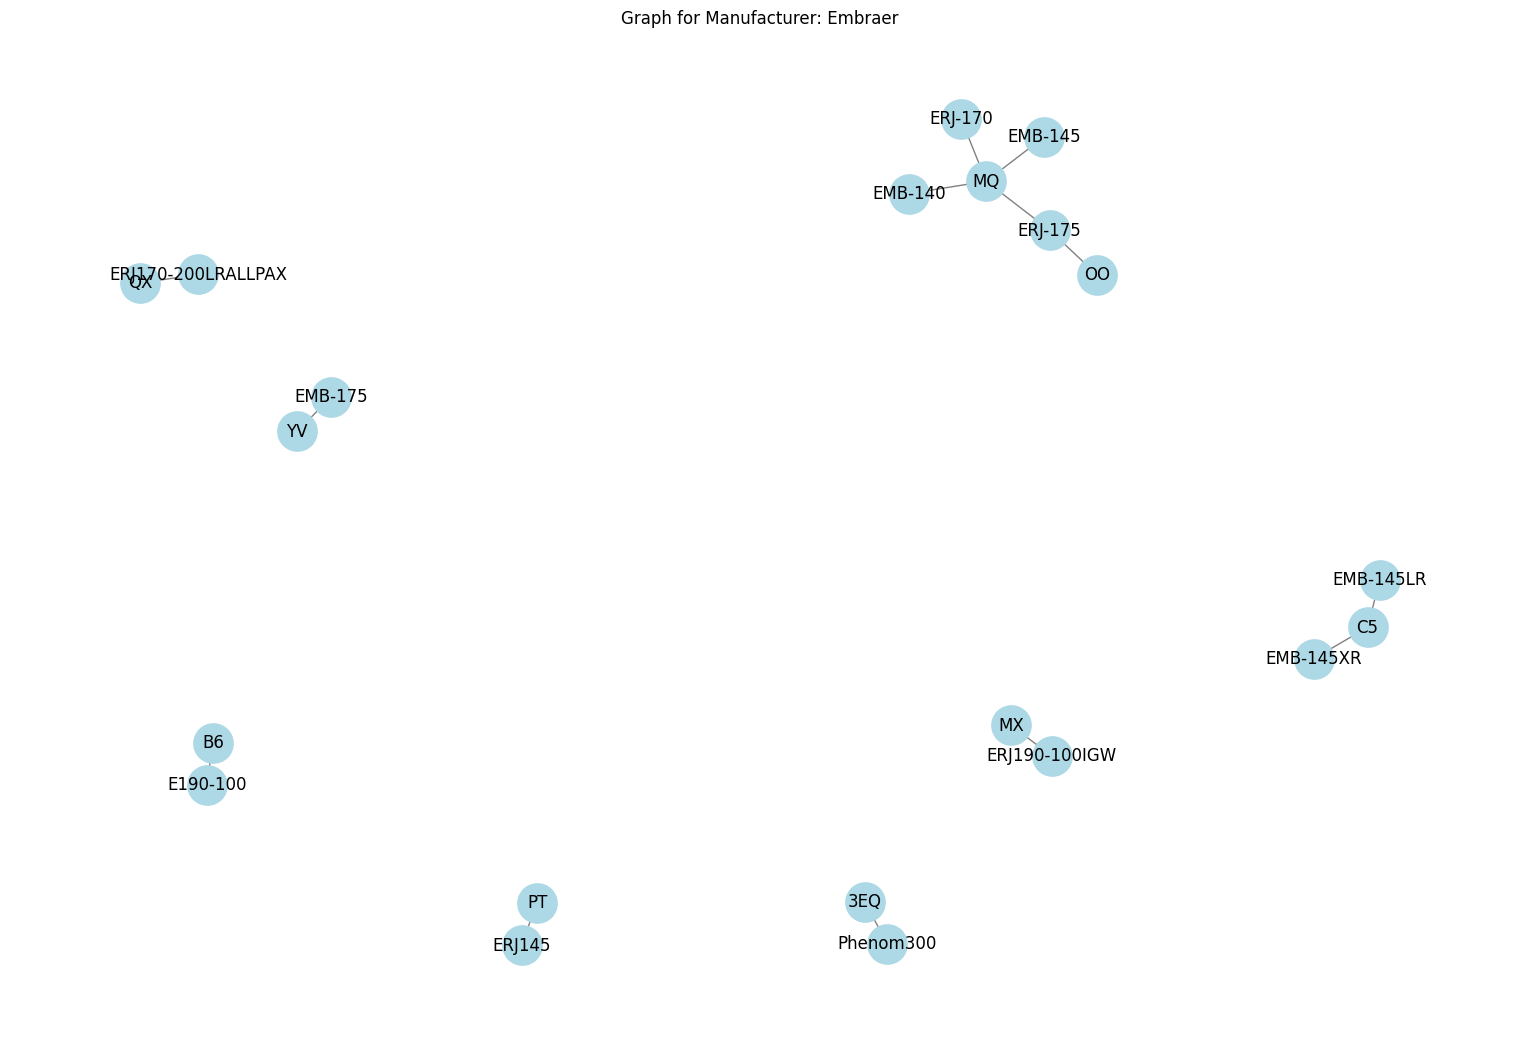

Manufacturer: Embraer
Eigenvector Centrality:
Node MQ: 0.6767662616666871
Node ERJ-175: 0.4250440862593989
Node ERJ-170: 0.3262603888755085
Node EMB-145: 0.3262603888755085
Node EMB-140: 0.3262603888755085
Node OO: 0.20490833653460458
Node C5: 2.6235814442756057e-05
Node EMB-145LR: 1.8551522302424773e-05
Node EMB-145XR: 1.8551522302424773e-05
Node Phenom300: 9.673320658161385e-09
Node E190-100: 9.673320658161385e-09
Node ERJ190-100IGW: 9.673320658161385e-09
Node PT: 9.673320658161385e-09
Node 3EQ: 9.673320658161385e-09
Node EMB-175: 9.673320658161385e-09
Node ERJ170-200LRALLPAX: 9.673320658161385e-09
Node QX: 9.673320658161385e-09
Node B6: 9.673320658161385e-09
Node MX: 9.673320658161385e-09
Node ERJ145: 9.673320658161385e-09
Node YV: 9.673320658161385e-09



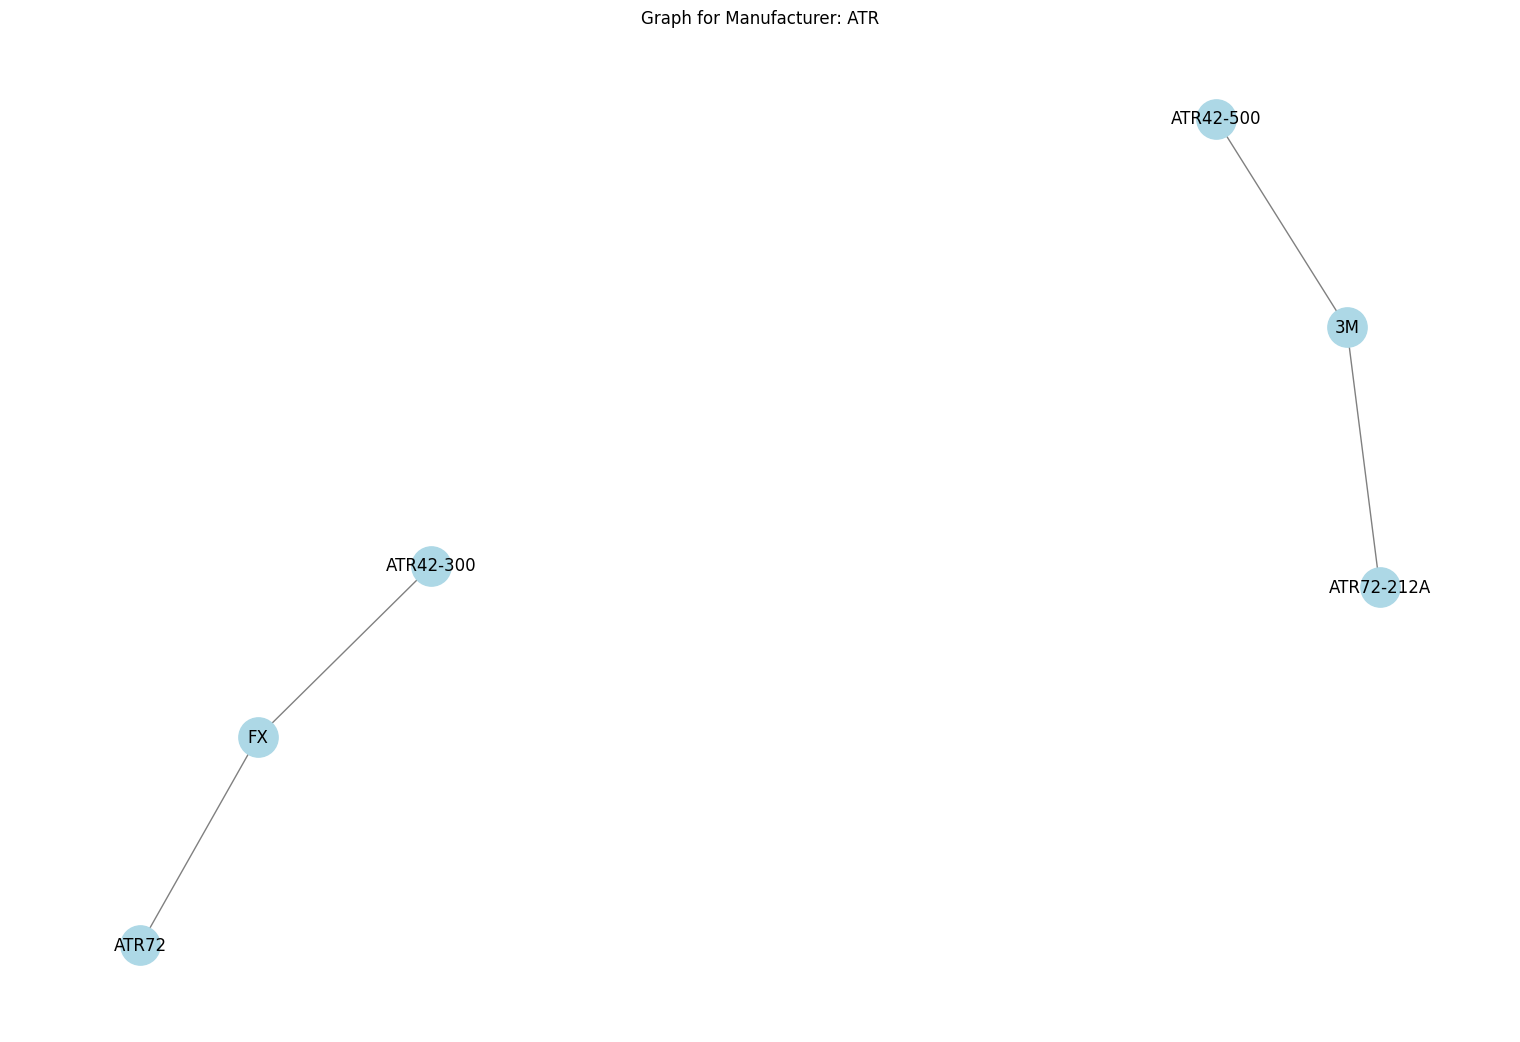

Manufacturer: ATR
Eigenvector Centrality:
Node 3M: 0.4999999355819319
Node FX: 0.4999999355819319
Node ATR72-212A: 0.3535534361437207
Node ATR42-300: 0.3535534361437207
Node ATR42-500: 0.3535534361437207
Node ATR72: 0.3535534361437207



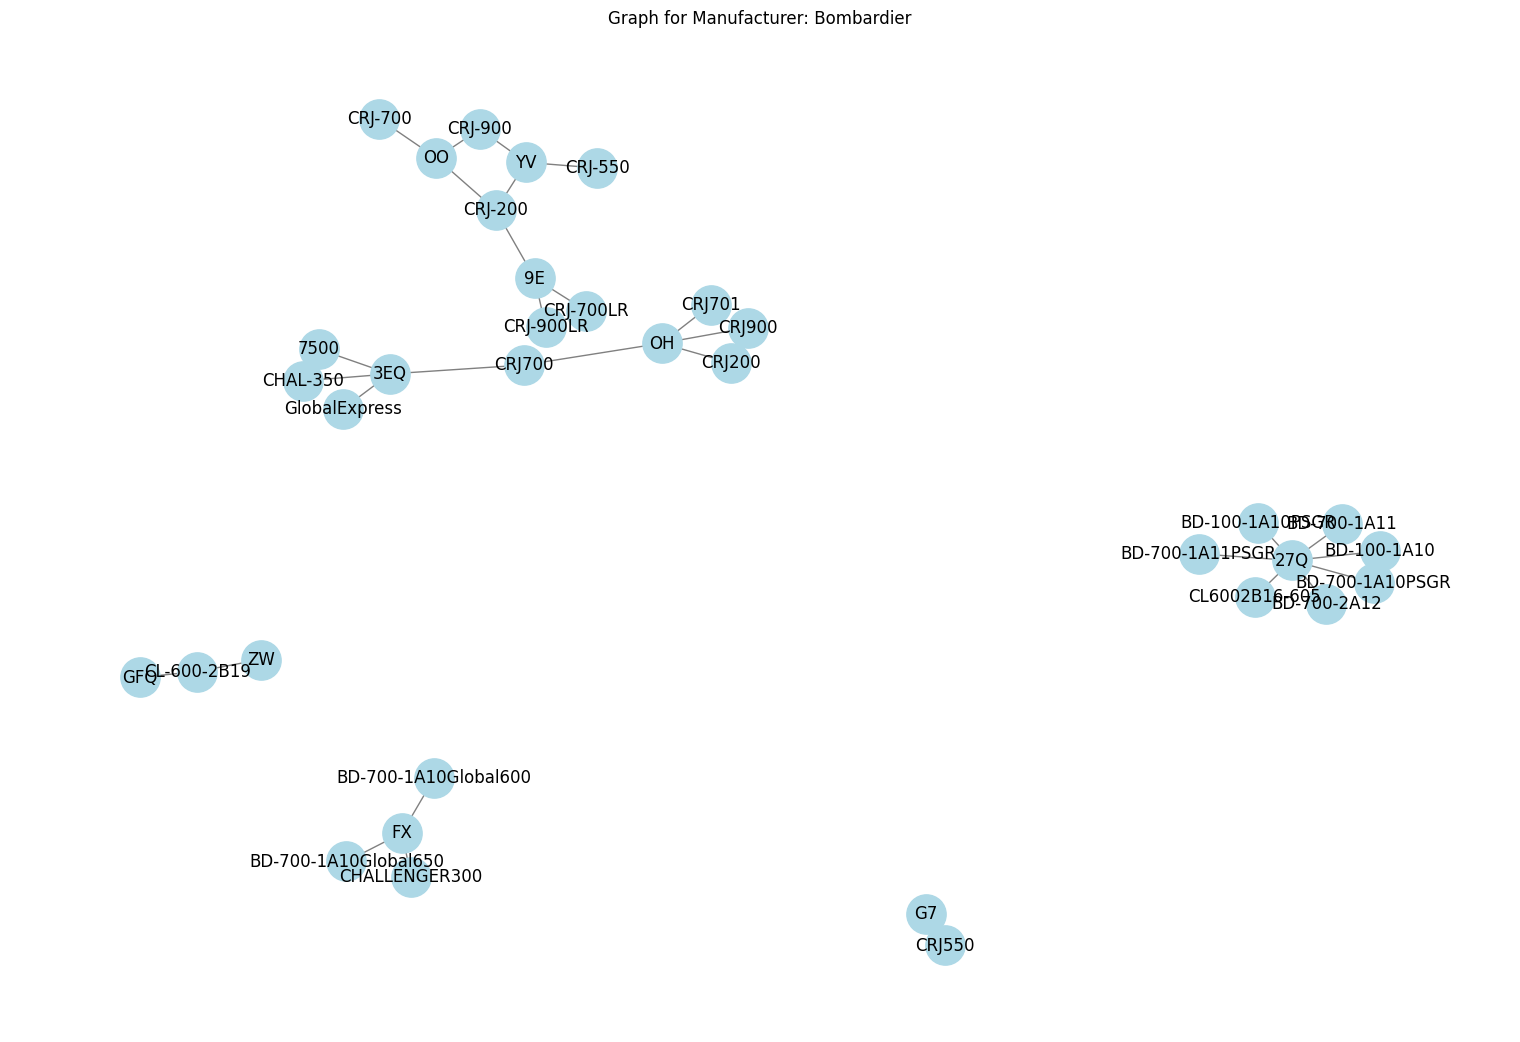

Manufacturer: Bombardier
Eigenvector Centrality:
Node 27Q: 0.7071067720637896
Node BD-700-2A12: 0.267261238464346
Node BD-700-1A11PSGR: 0.267261238464346
Node BD-700-1A10PSGR: 0.267261238464346
Node CL6002B16-605: 0.267261238464346
Node BD-100-1A10PSGR: 0.267261238464346
Node BD-700-1A11: 0.267261238464346
Node BD-100-1A10: 0.267261238464346
Node CRJ-200: 8.139291318906395e-05
Node YV: 7.132681586515587e-05
Node OO: 7.132681586515587e-05
Node CRJ-900: 5.95837478304378e-05
Node 9E: 5.2214853155403975e-05
Node CRJ-550: 2.9791873915218898e-05
Node CRJ-700: 2.9791873915218898e-05
Node CRJ-700LR: 2.180916535862617e-05
Node CRJ-900LR: 2.180916535862617e-05
Node 3EQ: 2.3199948055685095e-07
Node OH: 2.3199948055685095e-07
Node CRJ700: 2.0750664370790374e-07
Node 7500: 1.0375332185395187e-07
Node CRJ900: 1.0375332185395187e-07
Node CHAL-350: 1.0375332185395187e-07
Node GlobalExpress: 1.0375332185395187e-07
Node CRJ701: 1.0375332185395187e-07
Node CRJ200: 1.0375332185395187e-07
Node FX: 2.053523

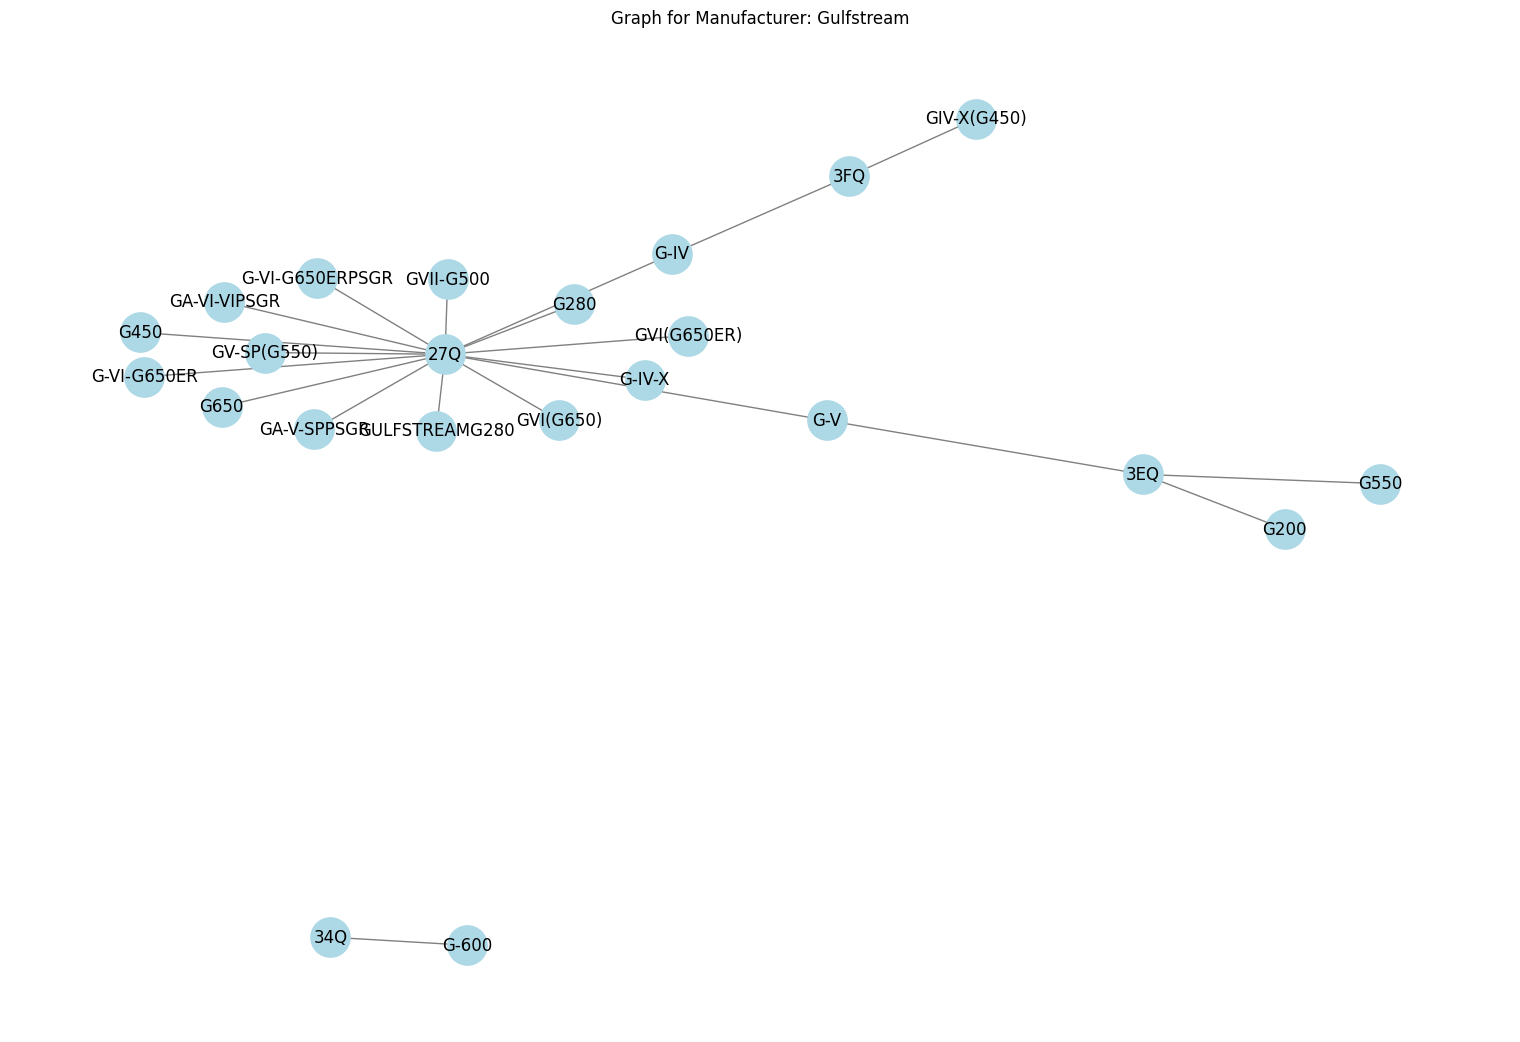

Manufacturer: Gulfstream
Eigenvector Centrality:
Node 27Q: 0.7027130052057473
Node G-V: 0.19533604135199084
Node G-IV: 0.1942077358687404
Node GVI(G650ER): 0.18049080394791517
Node G-VI-G650ERPSGR: 0.18049080394791517
Node GVI(G650): 0.18049080394791517
Node G-VI-G650ER: 0.18049080394791517
Node GA-VI-VIPSGR: 0.18049080394791517
Node G280: 0.18049080394791517
Node GA-V-SPPSGR: 0.18049080394791517
Node GV-SP(G550): 0.18049080394791517
Node GVII-G500: 0.18049080394791517
Node G-IV-X: 0.18049080394791517
Node GULFSTREAMG280: 0.18049080394791517
Node G450: 0.18049080394791517
Node G650: 0.18049080394791517
Node 3EQ: 0.0577974084028059
Node 3FQ: 0.05340475427214805
Node G200: 0.01484523740407569
Node G550: 0.01484523740407569
Node GIV-X(G450): 0.01371693192082525
Node G-600: 1.3142039934733087e-10
Node 34Q: 1.3142039934733087e-10



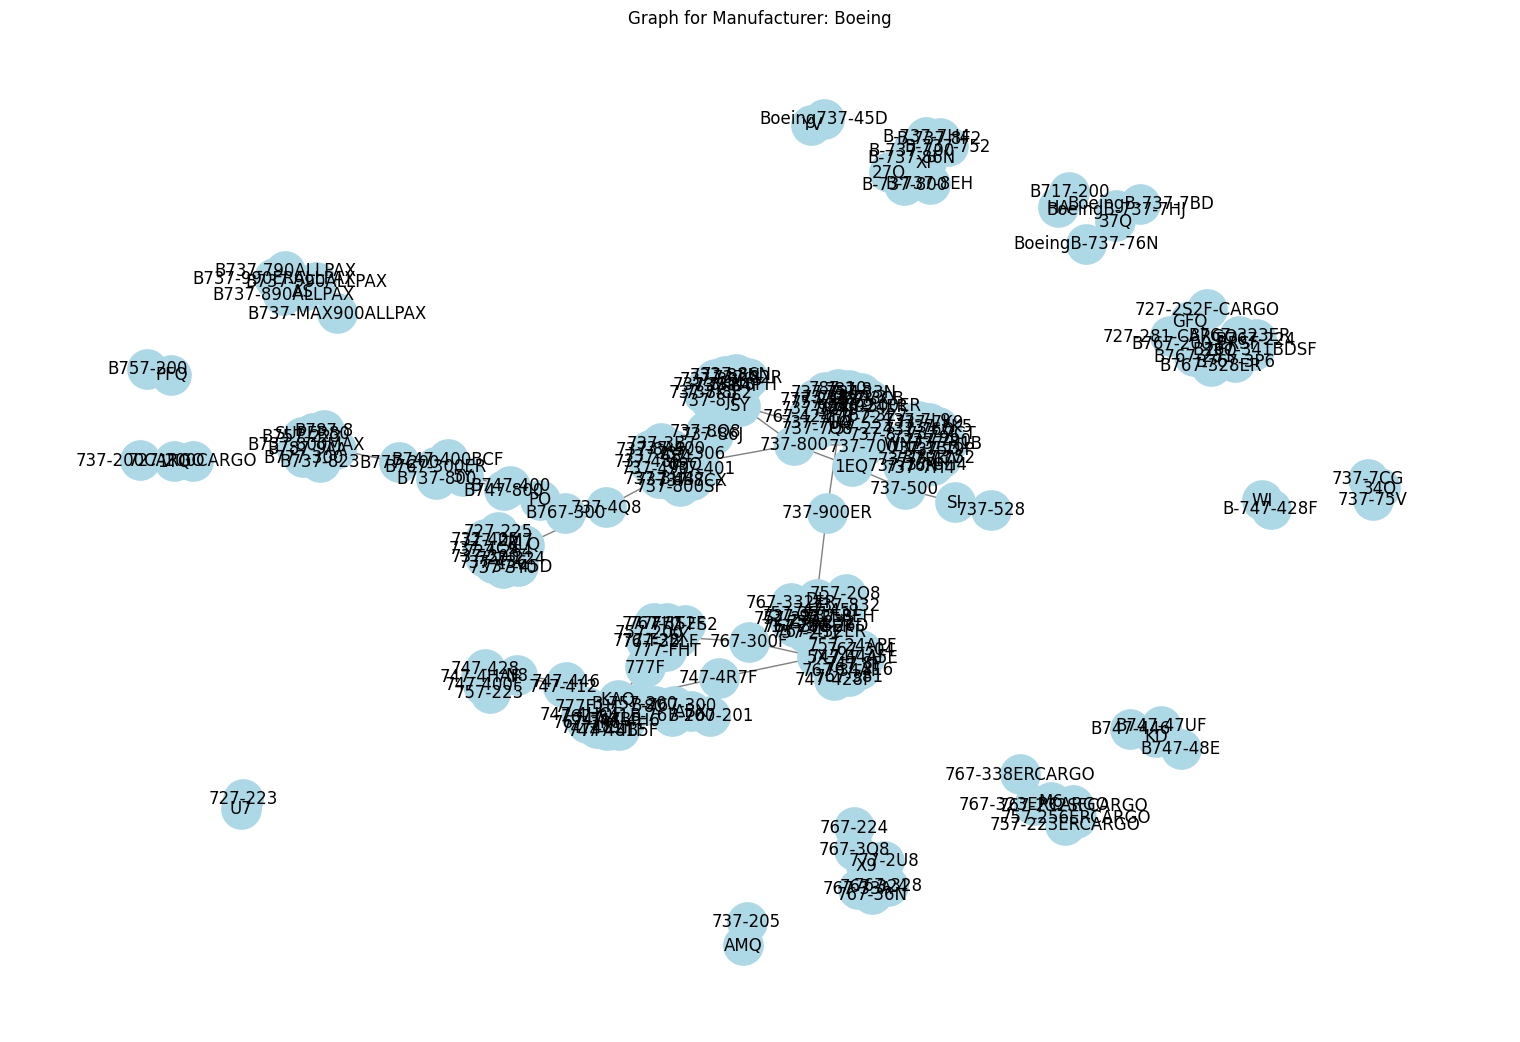

Manufacturer: Boeing
Eigenvector Centrality:
Node UA: 0.5481593874980607
Node WN: 0.3779574402238503
Node 737-800: 0.2587909185169193
Node 737-700: 0.1997947027292667
Node 737-8: 0.18145610558154354
Node SY: 0.1529242524703661
Node 09Q: 0.14815894292722032
Node 737-900ER: 0.11711760619146483
Node 737-71Q: 0.10739964075370068
Node 737-724: 0.10739964075370068
Node 737-7V3: 0.10739964075370068
Node 737-824: 0.10739964075370068
Node 737-9: 0.10739964075370068
Node 737-924: 0.10739964075370068
Node 737-924ER: 0.10739964075370068
Node 757-224: 0.10739964075370068
Node 757-324: 0.10739964075370068
Node 757-33N: 0.10739964075370068
Node 767-322: 0.10739964075370068
Node 767-3CB: 0.10739964075370068
Node 767-424ER: 0.10739964075370068
Node 777-222: 0.10739964075370068
Node 777-224: 0.10739964075370068
Node 777-300ER: 0.10739964075370068
Node 787-10: 0.10739964075370068
Node 787-8: 0.10739964075370068
Node 787-9: 0.10739964075370068
Node 737-7Q8: 0.10402121694103808
Node 1EQ: 0.0935953583284476

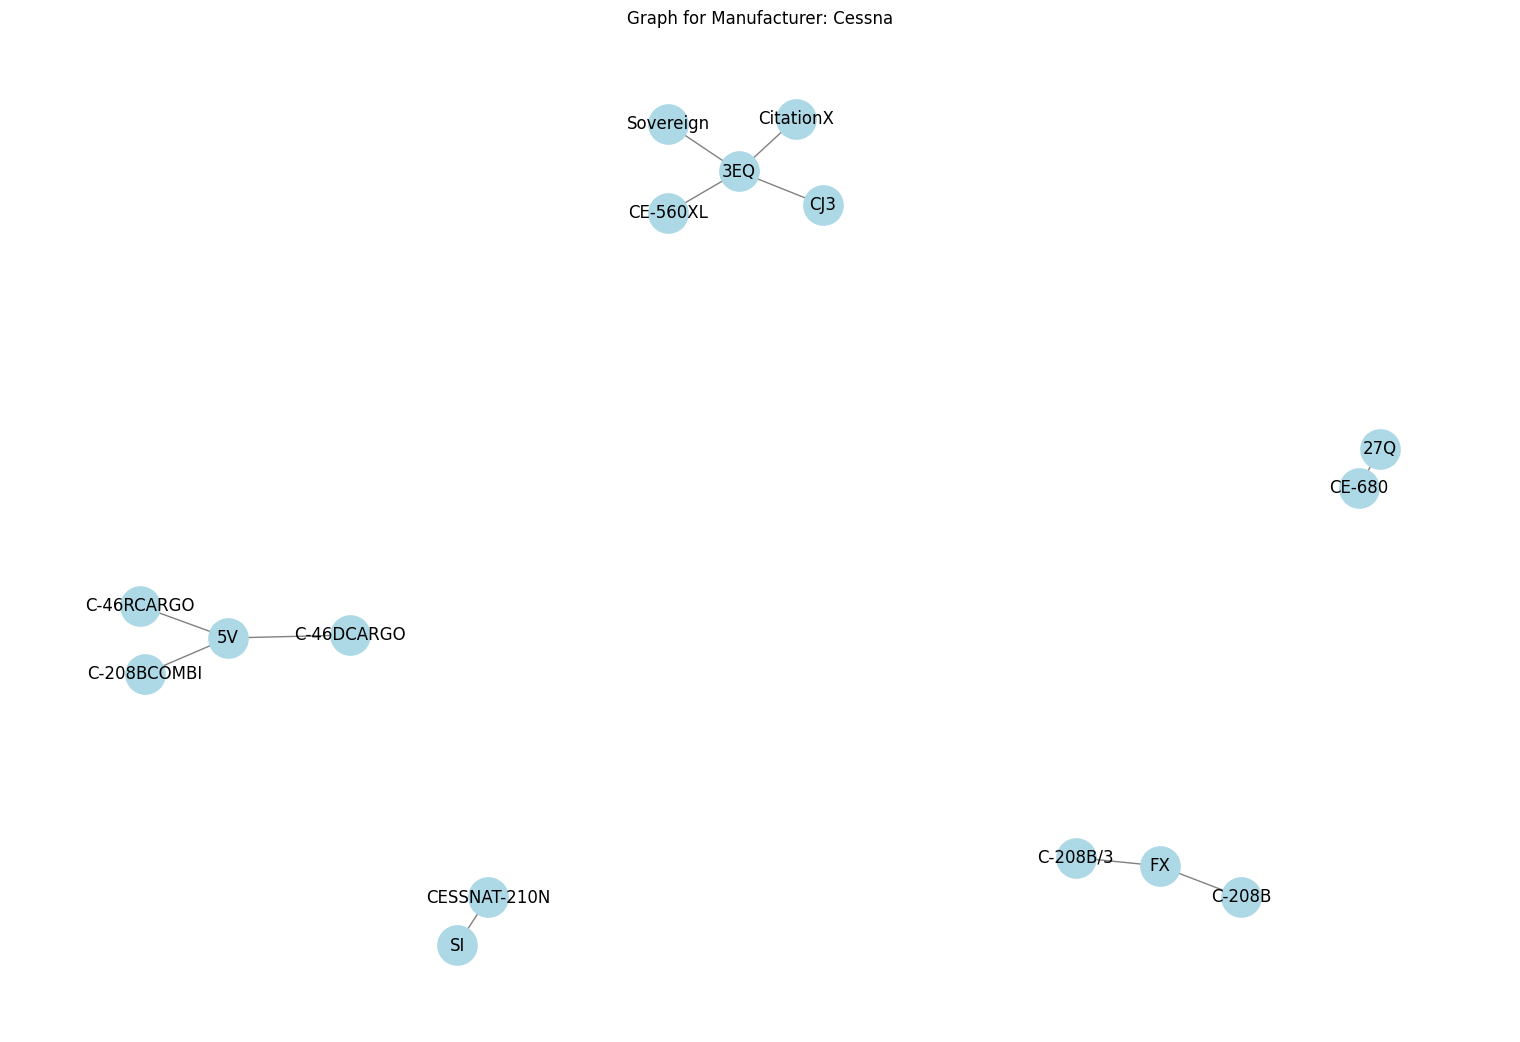

Manufacturer: Cessna
Eigenvector Centrality:
Node 3EQ: 0.7071067789952901
Node CE-560XL: 0.35355338949764503
Node CJ3: 0.35355338949764503
Node CitationX: 0.35355338949764503
Node Sovereign: 0.35355338949764503
Node 5V: 5.566781888608165e-05
Node C-46RCARGO: 3.2139830219078576e-05
Node C-208BCOMBI: 3.2139830219078576e-05
Node C-46DCARGO: 3.2139830219078576e-05
Node FX: 2.0921002591042546e-10
Node C-208B/3: 1.4793382801347515e-10
Node C-208B: 1.4793382801347515e-10
Node CESSNAT-210N: 1.1594922126802469e-18
Node SI: 1.1594922126802469e-18
Node 27Q: 1.1594922126802469e-18
Node CE-680: 1.1594922126802469e-18



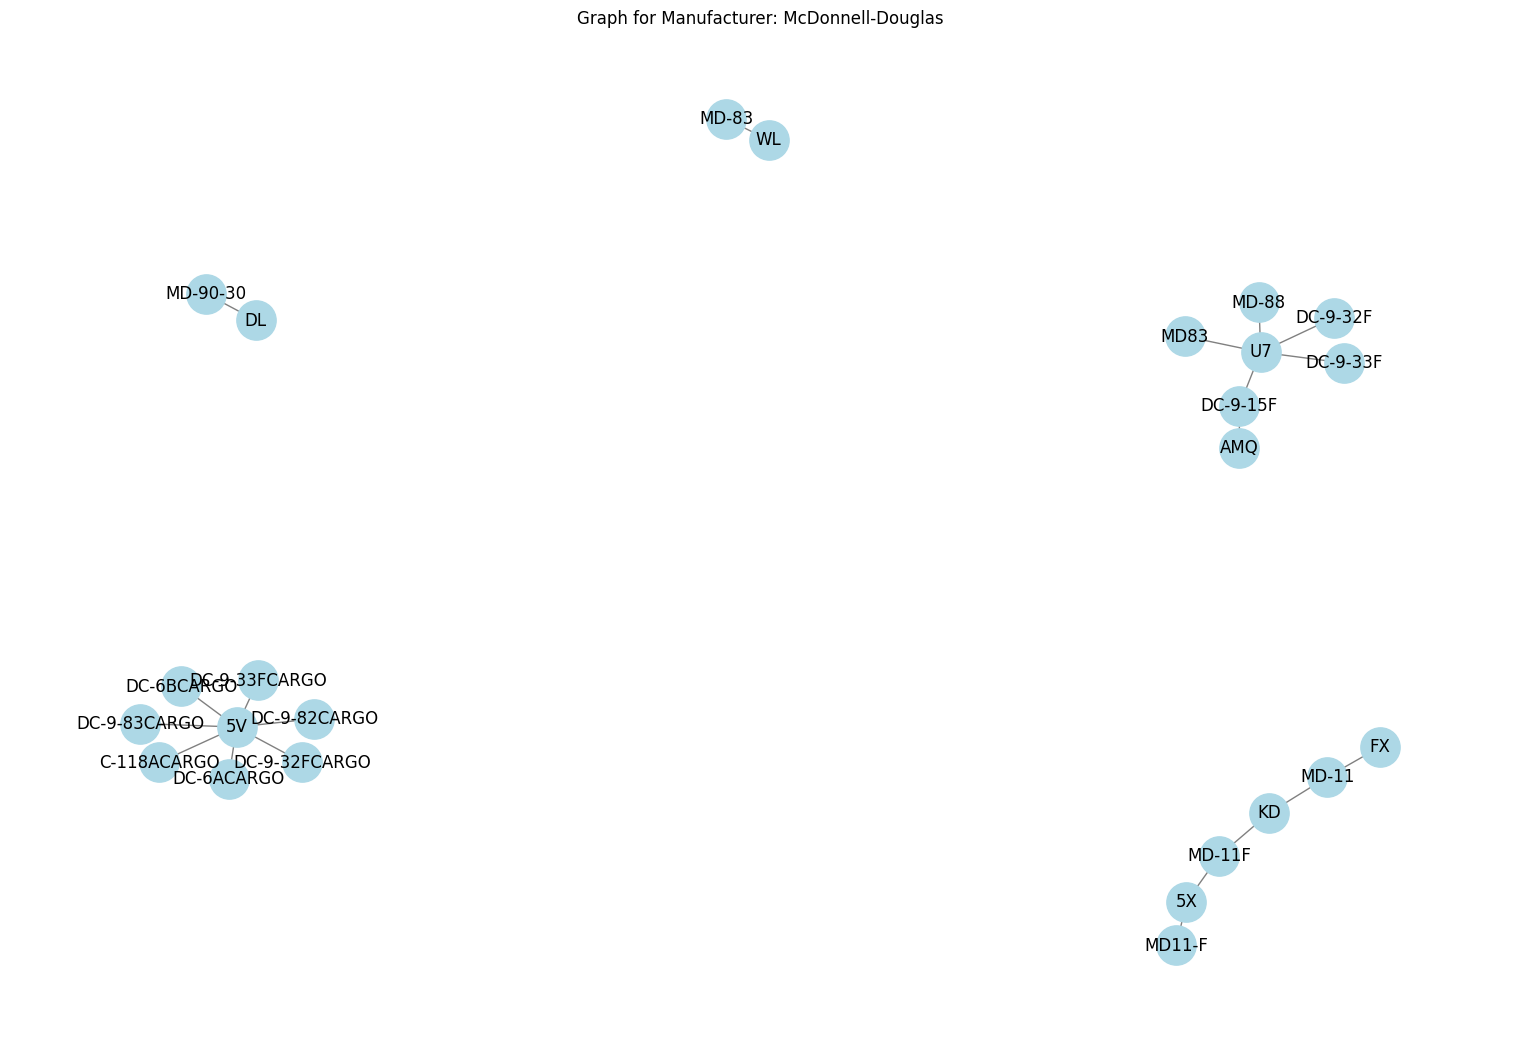

Manufacturer: McDonnell-Douglas
Eigenvector Centrality:
Node 5V: 0.7071067785112292
Node DC-9-32FCARGO: 0.26726124090124914
Node DC-6ACARGO: 0.26726124090124914
Node DC-9-33FCARGO: 0.26726124090124914
Node DC-9-82CARGO: 0.26726124090124914
Node DC-9-83CARGO: 0.26726124090124914
Node DC-6BCARGO: 0.26726124090124914
Node C-118ACARGO: 0.26726124090124914
Node U7: 5.986447695533191e-05
Node DC-9-15F: 3.233768376514756e-05
Node MD83: 2.6161735724727214e-05
Node MD-88: 2.6161735724727214e-05
Node DC-9-33F: 2.6161735724727214e-05
Node DC-9-32F: 2.6161735724727214e-05
Node AMQ: 1.4132085998927971e-05
Node MD-11F: 2.4303208303553972e-11
Node KD: 2.4303208303553972e-11
Node MD-11: 1.9489659839745417e-11
Node 5X: 1.9489659839745417e-11
Node MD11-F: 1.0815945219683372e-11
Node FX: 1.0815945219683372e-11
Node MD-83: 1.3200607168901394e-24
Node WL: 1.3200607168901394e-24
Node DL: 1.3200607168901394e-24
Node MD-90-30: 1.3200607168901394e-24



In [17]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the graph
G = nx.from_pandas_edgelist(df, 'CARRIER', 'MODEL', edge_attr='MANUFACTURER', create_using=nx.Graph())

# Define the manufacturer groups
manufacturers = set(nx.get_edge_attributes(G, 'MANUFACTURER').values())

# Calculate centrality measures for each manufacturer group
centrality_measures = {}
for manufacturer in manufacturers:
    subgraph = G.edge_subgraph((u, v) for u, v, data in G.edges(data=True) if data['MANUFACTURER'] == manufacturer)
    eigenvector_centrality = nx.eigenvector_centrality(subgraph, max_iter=1000, tol=1e-6)

    centrality_measures[manufacturer] = eigenvector_centrality

    # Graph visualization
    plt.figure(figsize=(15, 10))
    nx.draw(subgraph, with_labels=True, node_color='lightblue', edge_color='gray', node_size=800)
    plt.title(f"Graph for Manufacturer: {manufacturer}")
    plt.show()

    # Compare the centrality measures for the current manufacturer
    sorted_centrality = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)

    print(f"Manufacturer: {manufacturer}")

    print("Eigenvector Centrality:")
    for node, centrality in sorted_centrality:
        print(f"Node {node}: {centrality}")

    print()
